In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 10]


In [10]:
import os
import pandas as pd
from google.cloud import bigquery
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/philipmassey/.tokens/google_my-compute-engine.json"
client = bigquery.Client()         # Start the BigQuery Client
# Input your Query Syntax here; You may try it first at https://console.cloud.google.com/bigquery
QUERY = (
    'SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` ' 
     'ORDER BY date DESC,confirmed_cases DESC '
    'LIMIT 200')
query_job = client.query(QUERY)    # Start Query API Request
query_result = query_job.result()  # Get Query Result
df = query_result.to_dataframe()   # Save the Query Resultto Dataframe
df

,date,county,state_name,county_fips_code,confirmed_cases,deaths
0,2020-08-01,New York City,New York,None,230147,23007
1,2020-08-01,Los Angeles,California,06037,190693,4669
2,2020-08-01,Miami-Dade,Florida,12086,121206,1647
3,2020-08-01,Maricopa,Arizona,04013,119295,2089
4,2020-08-01,Cook,Illinois,17031,106131,4888
...,...,...,...,...,...,...
195,2020-08-01,Lexington,South Carolina,45063,4580,101
196,2020-08-01,St. Louis city,Missouri,29510,4579,169
197,2020-08-01,Dutchess,New York,36027,4504,162
198,2020-08-01,Benton,Arkansas,05007,4495,39


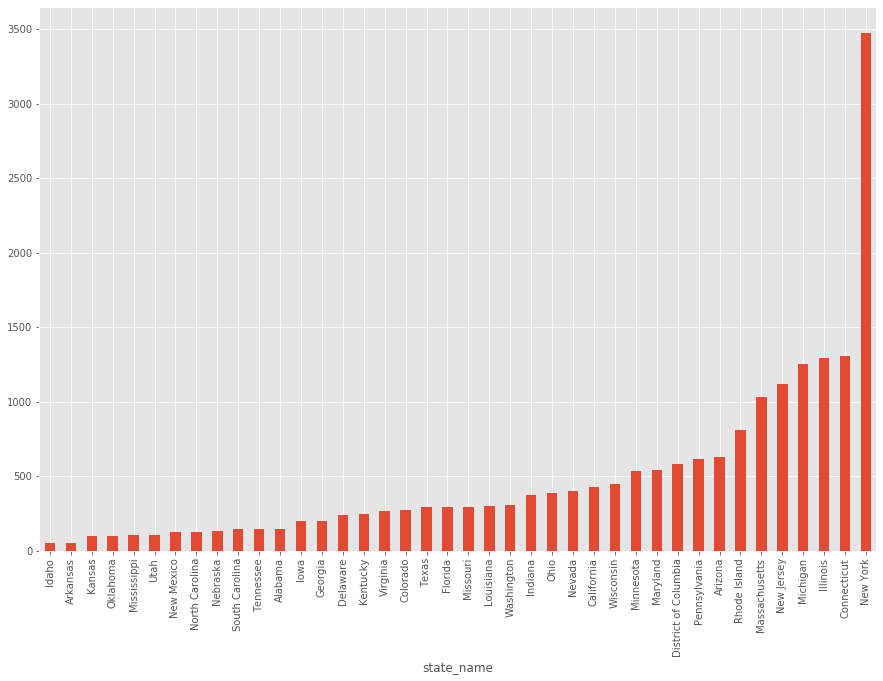

In [11]:
#x = df.groupby('state_name')['deaths'].mean().sort_values()
x = df.groupby('state_name')['deaths'].mean().sort_values()
x.plot(kind='bar',figsize=(15, 10))

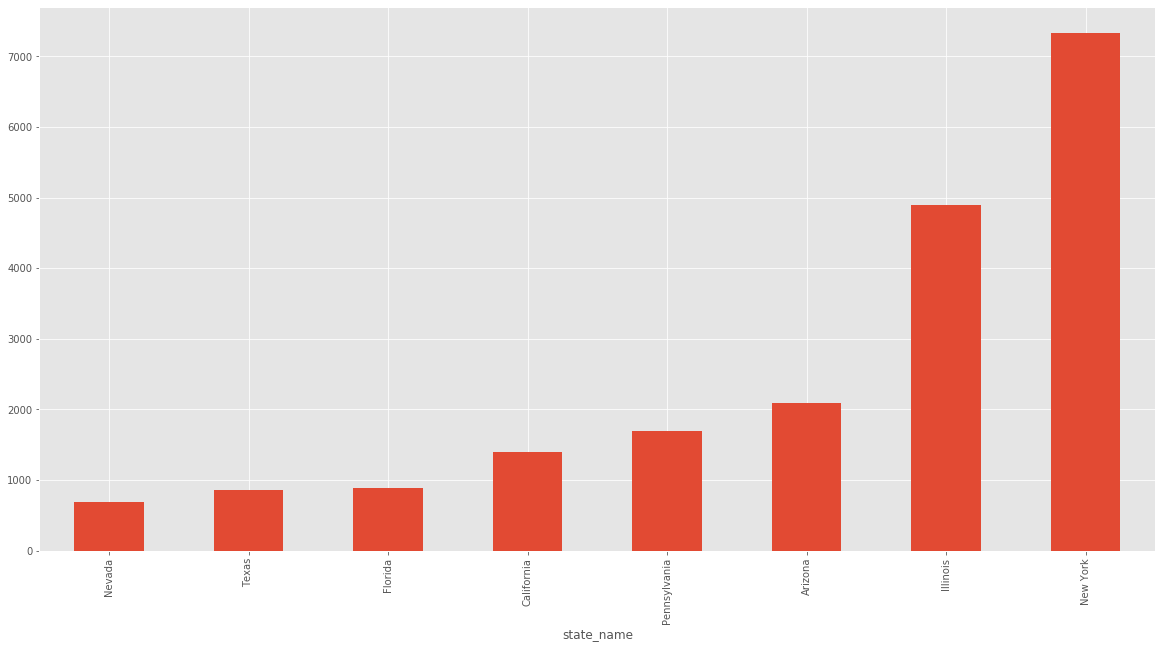

In [12]:
QUERY = (
    'SELECT * FROM `bigquery-public-data.covid19_nyt.us_counties` ' 
    'ORDER BY date DESC,confirmed_cases DESC '
    'LIMIT 20')
query_job = client.query(QUERY)    # Start Query API Request
query_result = query_job.result()  # Get Query Result
df = query_result.to_dataframe()   # Save the Query Resultto Dataframe
x = df.groupby('state_name')['deaths'].mean().sort_values()
x.plot(kind='bar')